In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

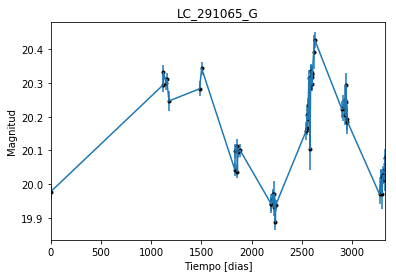

In [2]:
data = np.genfromtxt('LC_291065_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_291065_G')
plt.savefig("LC_291065_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

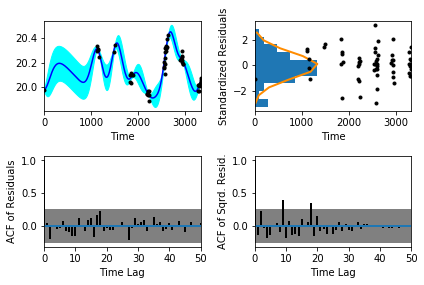

In [5]:
sample.assess_fit()

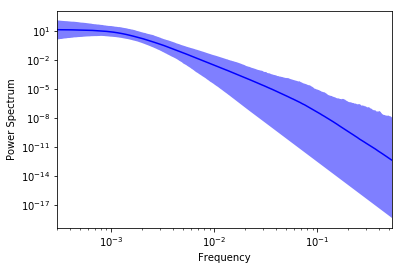

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

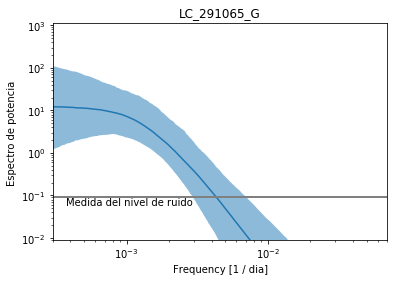

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_291065_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_291065_G')

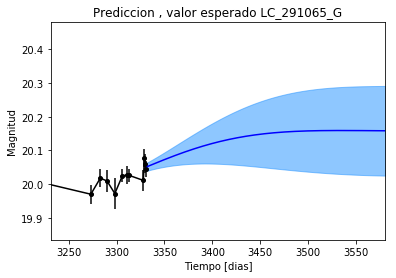

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_291065_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_291065_G')

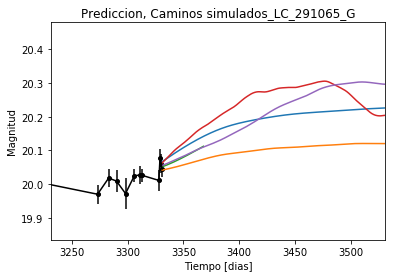

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_291065_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


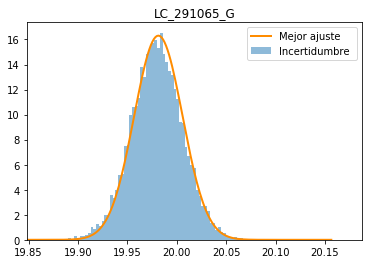

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_291065_G')
plt.savefig("Mejor_ajuste_LC_285764_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_291065_G')

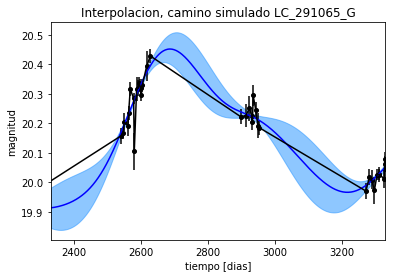

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_G')

Text(0.5,1,'Interpolacion, camino simulado LC_291065_G')

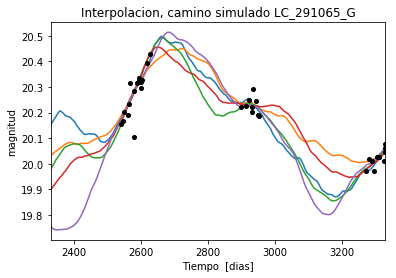

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 654.827219188
Median: 0.00345763778089
Standard deviation: 0.174900792032
68% credibility interval: [ 0.00055737  0.09934656]
95% credibility interval: [  3.29897254e-04   7.11211652e-01]
99% credibility interval: [  3.05973633e-04   9.58368403e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 513.785600005
Median: 0.00117632142849
Standard deviation: 0.0640171200709
68% credibility interval: [ 0.0004685   0.01003613]
95% credibility interval: [ 0.00031966  0.15578878]
99% credibility interval: [  3.05594187e-04   4.50189088e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 519.929494451
Median: 0.00744346703384
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 624.079726475
Median: 121.125522556
Standard deviation: 1.77137560293
68% credibility interval: [ 119.26249545  122.59851474]
95% credibility interval: [ 116.62474782  123.62394211]
99% credibility interval: [ 114.71239415  124.21173871]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 578.009885806
Median: 0.328553676262
Standard deviation: 1.92753516709
68% credibility interval: [ 0.03372182  3.04762699]
95% credibility interval: [ 0.01243492  6.59635989]
99% credibility interval: [ 0.00928522  8.79840273]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 937.277272717
Median: 0.164498063033
Standard deviation: 8.42675083255
68% credibility interval: [  3.46815540e-03   5.79929031e+00]
95% credibility interval: [  3.4

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6054.68019041
Median: 3.25631129088e-43
Standard deviation: 1.95272347373e+70
68% credibility interval: [  1.61802353e-85   6.36994853e-03]
95% credibility interval: [  2.55964284e-172   3.12470580e+055]
99% credibility interval: [  1.16880000e-193   9.20481912e+068]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3480.61432073
Median: 20.1409888554
Standard deviation: 0.0898922636035
68% credibility interval: [ 20.07106843  20.20405615]
95% credibility interval: [ 19.9527662  20.3130836]
99% credibility interval: [ 19.81182669  20.43389984]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 380.903957405
Median: 0.00144641243976
Standard deviation: 0.24188170398
68% credibility interval: [ 0.          0.28256695]
95% credibility interval: [ 0.          0.90896877]
99% credibility interval: [ 0.          1.03761113]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 380.903957405
Median: 0.00144641243976
Standard deviation: 0.24188170398
68% credibility interval: [ 0.          0.28256695]
95% credibility interval: [ 0.          0.90896877]
99% credibility interval: [ 0.          1.03761113]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 871.123853725
Median: 0.0
Standard deviation: 0.000536849502745
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 624.079726475
Median: 121.125522556
Standard deviation: 1.77137560293
68% credibility interval: [ 119.26249545  122.59851474]
95% credibility interval: [ 116.62474782  123.62394211]
99% credibility interval: [ 114.71239415  124.21173871]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3472.07764999
Median: 0.0354142338606
Standard deviation: 0.0535436732431
68% credibility interval: [ 0.02078708  0.06987332]
95% credibility interval: [ 0.01386353  0.1662411 ]
99% credibility interval: [ 0.01111964  0.36596852]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1465.23495942
Median: 1.21915092632
Standard deviation: 0.190007354389
68% credibility interval: [ 1.04698202  1.41425182]
95% credibility interval: [ 0.91128742  1.66656088]
99% credibility interval: [ 0.82292897  1.81685561]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2359.73053421
Median: 3.74419299529e-05
Standard deviation: 0.00875356515631
68% credibility interval: [  7.82482494e-08   1.59255802e-03]
95% credibility interval: [  1.21339991e-60   8.84140933e-03]
99% credibility interval: [  5.48251917e-74   2.23073611e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 654.827219188
Median: (-0.0217249789024-0.0243839677257j)
Standard deviation: 1.875476041
68% credibility interval: [-0.62421284+0.j         -0.00350203-0.00968815j]
95% credibility interval: [ -4.46867460e+00+0.j          -2.07280558e-03-0.00948643j]
99% credibility interval: [ -6.02160627e+00+0.j          -1.92248903e-03-0.01468047j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 513.785600005
Median: (-0.00739104551603+0.0111303021544j)
Standard deviation: 1.57211461901
68% credibility interval: [-0.06305887+0.07137659j -0.00294369+0.77733079j]
95% credibility interval: [-0.97884974+4.60777351j -0.00200846+0.02455052j]
99% credibility interval: [ -2.82862147e+00 +0.00000000e+00j  -1.92010491e-03 +1.24310605e-05j]
P